200702H                         Assignment 01                        Image Processing and Machine Vision

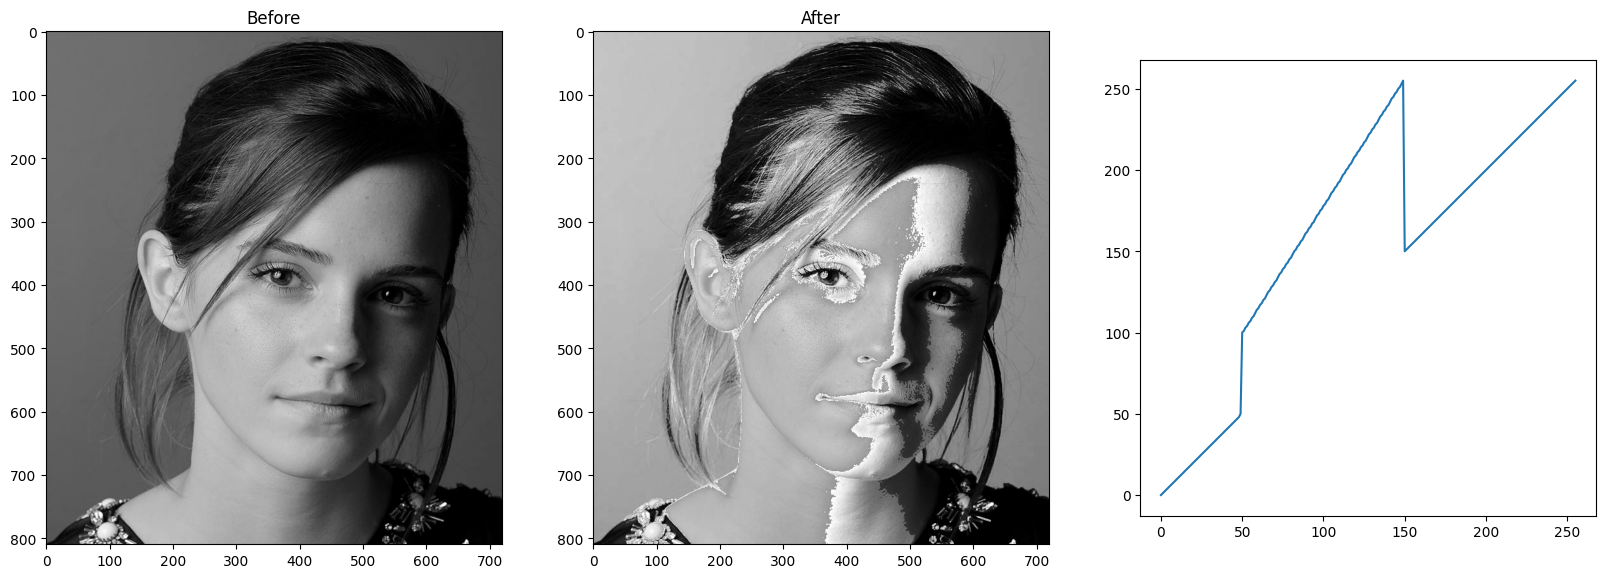

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

image0 = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
assert image0 is not None

transform1 = np.linspace(0,50,50)
transform2 = np.linspace(100,255,100)
transform3 = np.linspace(150,255,106)
transform = np.concatenate((transform1,transform2,transform3), axis = 0).astype(np.uint8)

transformed = cv.LUT(image0,transform)

assert len(transform)==256
image1 = cv.cvtColor(image0, cv.COLOR_BGR2RGB)
image2 = cv.cvtColor(transformed, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,3, figsize = (20,20))
ax[0].imshow(image1)
ax[1].imshow(image2)
ax[0].set_title('Before')
ax[1].set_title('After')
ax[2].plot(transform)
ax[2].set_aspect('equal')
plt.show()

2. Applying an intensity transform for a brain proton density slice

a) white matter

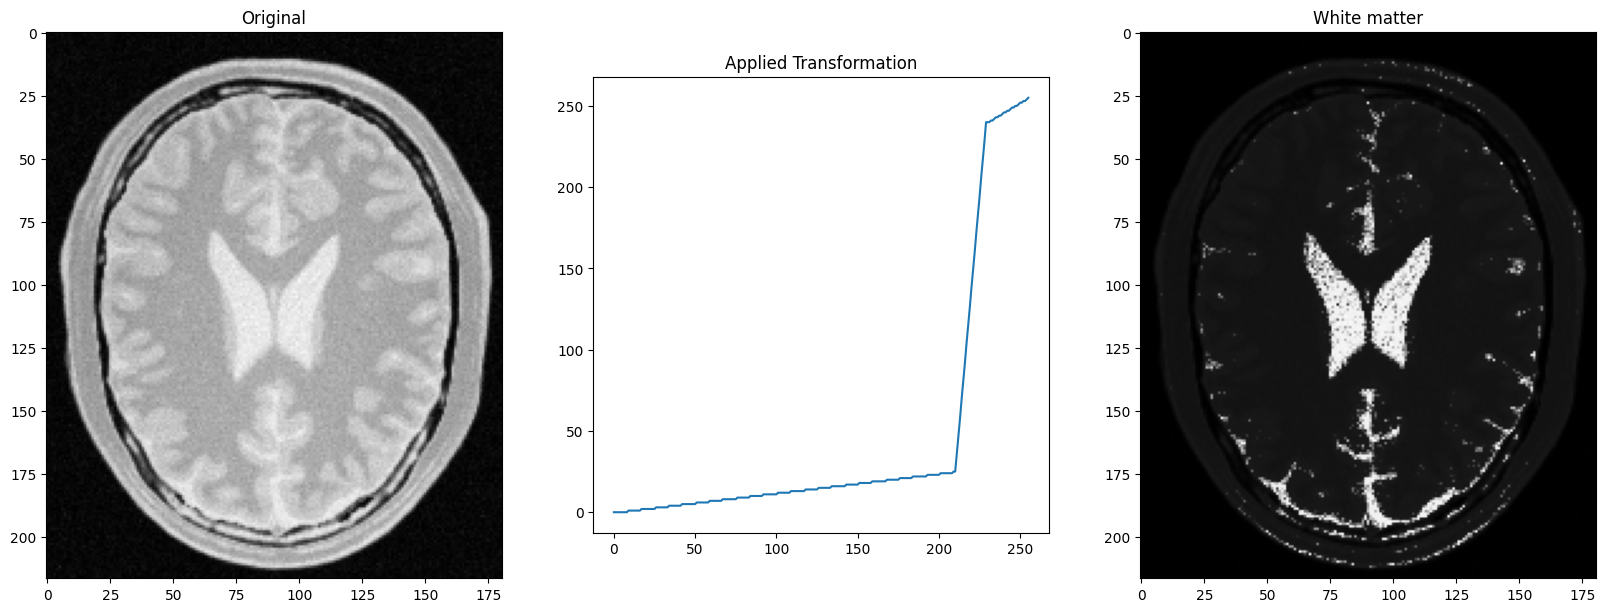

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

image0 = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
Converted = cv.cvtColor(image0, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,3,figsize = (20,20))
ax[0].imshow(Converted)

transform1 = np.linspace(0,25,210)
transform2 = np.linspace(25,240,20)
transform3 = np.linspace(240,255,26)
transform = np.concatenate((transform1,transform2,transform3), axis = 0).astype(np.uint8)

transformed = cv.LUT(image0,transform)

CvtTfd = cv.cvtColor(transformed, cv.COLOR_BGR2RGB)
ax[2].imshow(CvtTfd)
ax[1].plot(transform)
ax[1].set_aspect('equal')
ax[0].set_title('Original')
ax[1].set_title('Applied Transformation')
ax[2].set_title('White matter')
plt.show()


b) Gray Matter

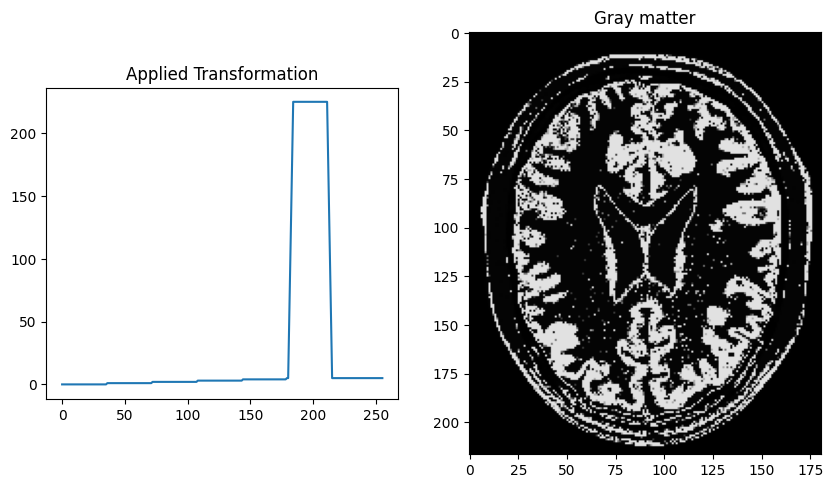

In [19]:

transform1 = np.linspace(0,5,180)
transform2 = np.linspace(5,225,5)
transform3 = np.linspace(225,225,26)
transform4 = np.linspace(225,5,5)
transform5 = np.linspace(5,5,40)

fig, ax = plt.subplots(1,2, figsize = (10,10))

transform = np.concatenate((transform1,transform2,transform3,transform4,transform5), axis = 0).astype(np.uint8)
transformed = cv.LUT(image0,transform)
imgCvtTfd= cv.cvtColor(transformed, cv.COLOR_BGR2RGB)

ax[0].plot(transform)
ax[0].set_aspect('equal')
ax[1].imshow(imgCvtTfd)
ax[1].set_title('Gray matter')
ax[0].set_title('Applied Transformation')
plt.show()

3. Gamma Correction

a) Gamma correction to the L plane
b) histograms

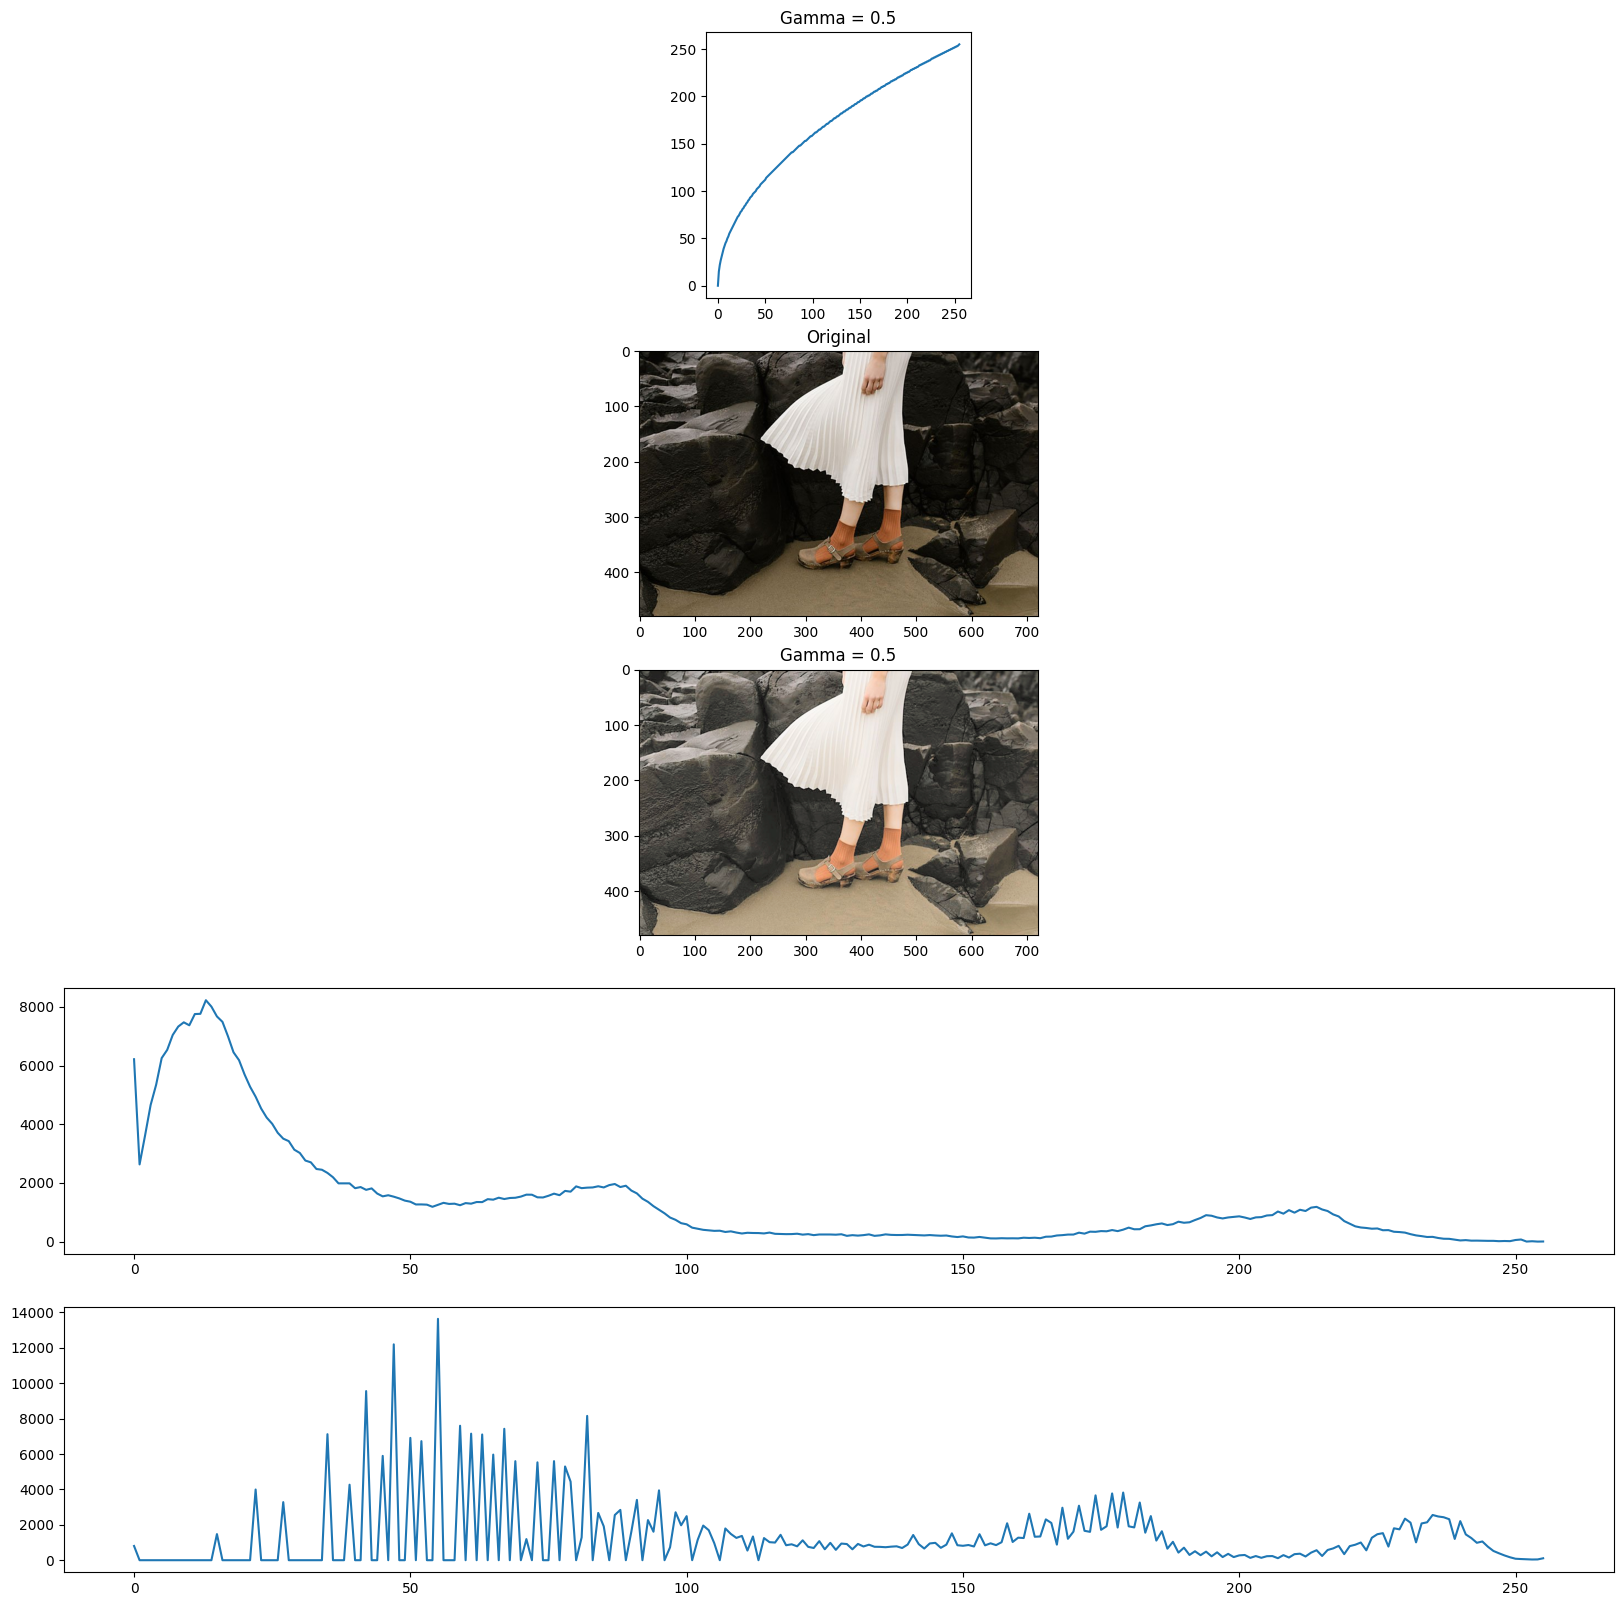

In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
img_gamma = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
gamma = [0.5]
for k in gamma:
    transform = np.array([(p/255)**k*255 for p in range(0,256)]).astype(np.uint8)#
    img_gamma[:,:,0]  = cv.LUT(img_gamma[:,:,0],transform)
    img_converted1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
    img_converted2 = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)
    fig, axarr = plt.subplots(5,1, figsize = (20,20))
    axarr[0].plot(transform)
    axarr[0].set_title('Gamma = %s'%k)
    axarr[0].set_aspect('equal')
    axarr[1].imshow(img_converted1)
    axarr[2].imshow(img_converted2)
    axarr[1].set_title('Original')
    axarr[2].set_title('Gamma = %s'%k)
    hist_gamma1 = cv.calcHist([img_orig],[0],None,[256],[0,256])
    hist_gamma2 = cv.calcHist([img_gamma],[0],None,[256],[0,256])
    axarr[3].plot(hist_gamma1)
    axarr[4].plot(hist_gamma2)

plt.show()

4. Vibrance increment

a)hue, saturation, and value planes.

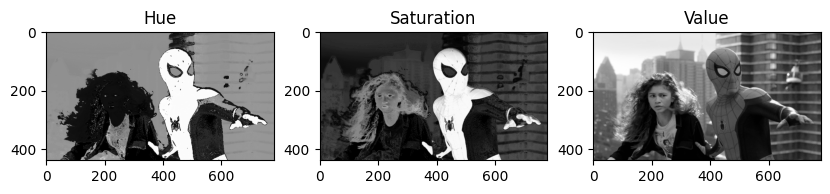

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('spider.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
hue, saturation, value = cv2.split(image)

# Display the planes
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue')

plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')

plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value')

plt.show()


b)aforementioned intensity transformation to the saturation plane.

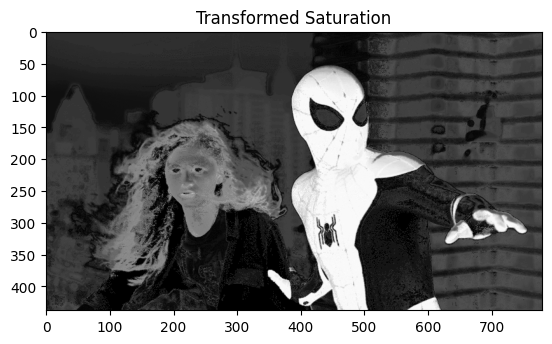

In [23]:
a = 0.5  # Example value for demonstration
sigma = 70

transformed_saturation = np.minimum(
    saturation + a * 128 * np.exp(-((saturation - 128) ** 2) / (2 * sigma ** 2)), 255
)

# Display the transformed saturation plane
plt.imshow(transformed_saturation, cmap='gray')
plt.title('Transformed Saturation')
plt.show()


c)a visually pleasing output

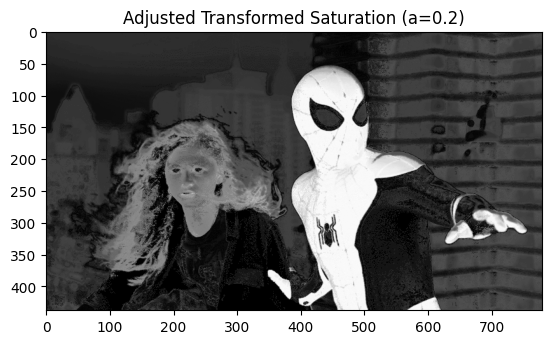

Value of 'a': 0.2


In [37]:
# Try different values of 'a' to find a visually pleasing output
a = 0.2 # Example value
transformed_saturation = np.minimum(
    saturation + a * 128 * np.exp(-((saturation - 128) ** 2) / (2 * sigma ** 2)), 255
)

# Display the transformed saturation plane with adjusted 'a'
plt.imshow(transformed_saturation, cmap='gray')
plt.title('Adjusted Transformed Saturation (a=0.2)')
plt.show()

print("Value of 'a':", a)


d) Recombine 3 planes

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('spider.png')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
hue, saturation, value = cv2.split(image_hsv)

# Apply the intensity transformation to the saturation plane
a = 0.2  # Adjust this value for desired effect
sigma = 70
transformed_saturation = np.minimum(
    saturation + a * 128 * np.exp(-((saturation - 128) ** 2) / (2 * sigma ** 2)), 255
)

# Recombine the planes
transformed_image_hsv = cv2.merge((hue, transformed_saturation.astype(np.uint8), value))

# Convert the image back to BGR color space
transformed_image_bgr = cv2.cvtColor(transformed_image_hsv, cv2.COLOR_HSV2BGR)




e)Displaying the original image, vibrance-enhanced image, and the intensity transformation

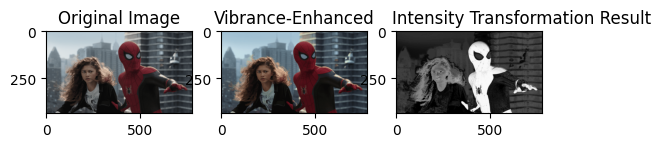

In [9]:
# Load the original image in BGR color space
original_image = cv2.imread('spider.png')
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.subplot(131)
plt.imshow(original_image_rgb)
plt.title('Original Image')


# Display the vibrance-enhanced image (recombined image)
plt.subplot(132)
plt.imshow(cv2.cvtColor(transformed_image_bgr, cv2.COLOR_BGR2RGB))
plt.title('Vibrance-Enhanced')






# Display the intensity transformation result
plt.subplot(133)
plt.imshow(transformed_saturation, cmap='gray')
plt.title('                    Intensity Transformation Result')

plt.tight_layout
plt.show()


5.histograms before and after equalization. 

(500, 500)


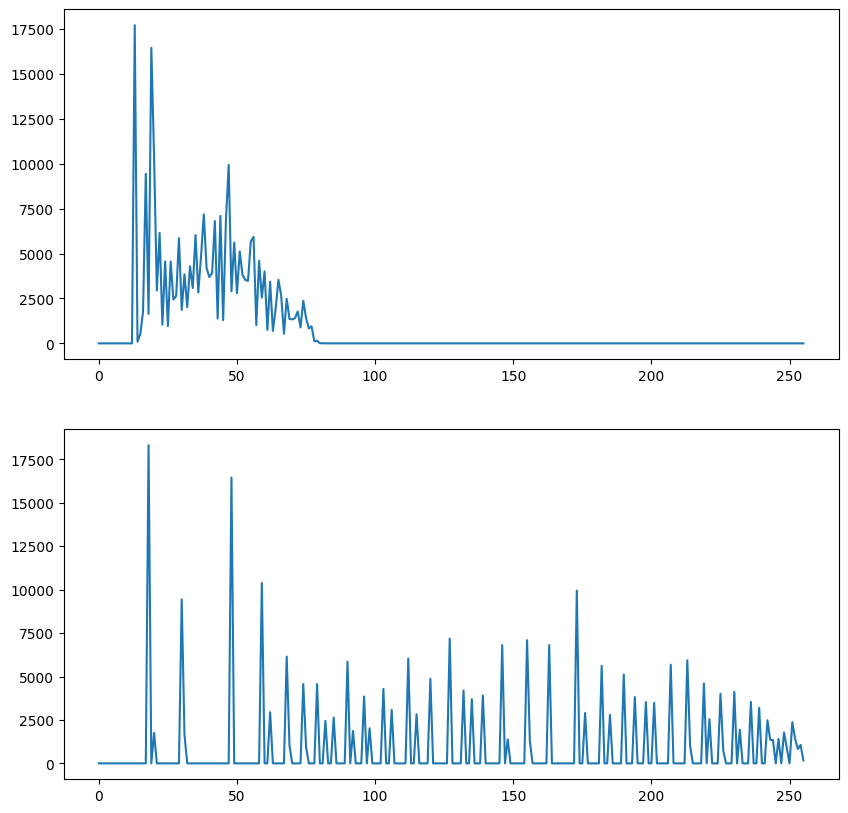

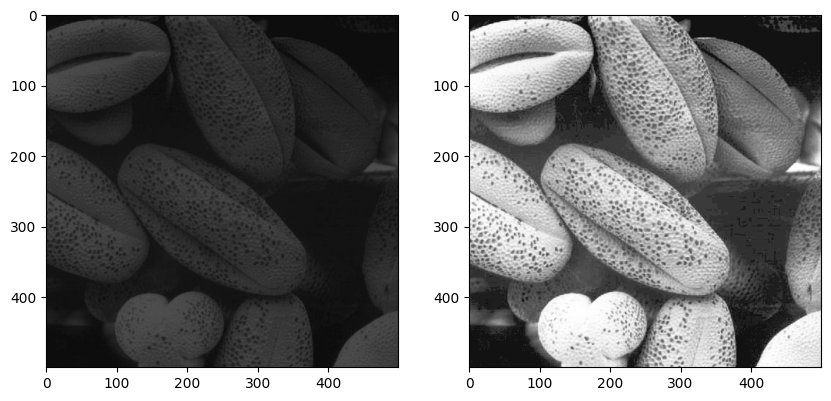

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)
print(img.shape)
CvtImg1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(2,1, figsize = (10,10))
hist , bins = np.histogram(img.ravel() , 256 , [0,256])
ax[0].plot(hist)
EqualizeMap = []
sum1 = 0
for i in range(len(bins)-1):
    sum1 += hist[i]
    a = int(round(sum1*255/(img.shape[0]*img.shape[1]),1))
    EqualizeMap.append(a)
    
EqualizedImage = cv.LUT(img,np.array(EqualizeMap).astype(np.uint8))
CvtImg2 = cv.cvtColor(EqualizedImage, cv.COLOR_BGR2RGB)
hist_equalized , bins_equalized = np.histogram(EqualizedImage.ravel() , 256 , [0,256])
ax[1].plot(hist_equalized)
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(CvtImg1)
ax[1].imshow(CvtImg2)

6)Histogram Equalization

a)hue, saturation, and value

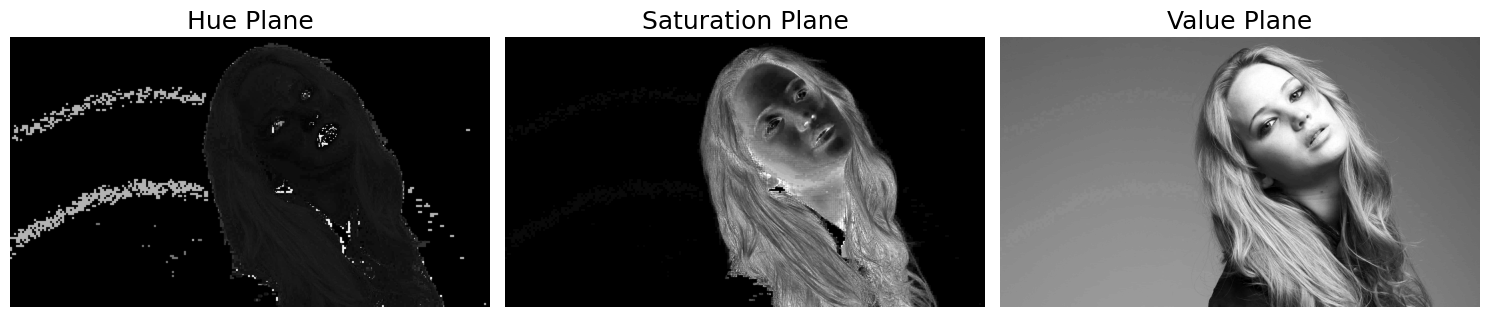

In [21]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load an image
input_image = cv.imread("jeniffer.jpg", cv.IMREAD_COLOR)

# Convert the image to HSV color space
hsv_image = cv.cvtColor(input_image, cv.COLOR_BGR2HSV)

# Extract the Hue, Saturation, and Value planes
hue_plane = hsv_image[:, :, 0]
saturation_plane = hsv_image[:, :, 1]
value_plane = hsv_image[:, :, 2]

# Create a figure for plotting
plt.figure(figsize=(15, 10))
plt.rc("axes", titlesize=18)

# Plot the Hue plane
plt.subplot(131)
plt.imshow(hue_plane, cmap='gray')
plt.title("Hue Plane")
plt.axis('off')

# Plot the Saturation plane
plt.subplot(132)
plt.imshow(saturation_plane, cmap='gray')
plt.title("Saturation Plane")
plt.axis('off')

# Plot the Value plane
plt.subplot(133)
plt.imshow(value_plane, cmap='gray')
plt.title("Value Plane")
plt.axis('off')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()




b)Foreground mask

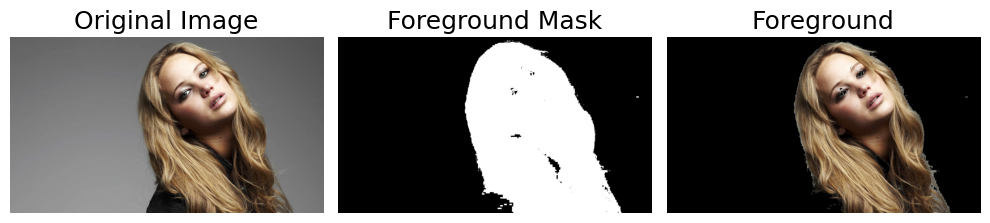

In [22]:
# Define a threshold value for separating the foreground
saturation_threshold = 12  # Adjusted for satisfactory separation

# Create a binary mask based on the saturation plane
binary_mask = (saturation_plane > saturation_threshold).astype(np.uint8) * 255
mask_3d = np.repeat(binary_mask[:, :, None], 3, axis=2)

# Extract the foreground using the mask
foreground_hsv = np.bitwise_and(img6_hsv, mask_3d)
foreground_rgb = cv.cvtColor(foreground_hsv, cv.COLOR_HSV2RGB)

# Create a figure for plotting
plt.figure(figsize=(10, 10))

# Plot the original image
plt.subplot(131)
plt.imshow(cv.cvtColor(img6, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Plot the binary mask
plt.subplot(132)
plt.imshow(mask_3d)
plt.title('Foreground Mask')
plt.axis('off')

# Plot the extracted foreground
plt.subplot(133)
plt.imshow(foreground_rgb)
plt.title('Foreground')
plt.axis('off')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


c,d)obtain the foreground only using cv.bitwise_and & histogram Cumulative Sum of the Histogram

Text(0.5, 1.0, 'Cumulative Sum of Histogram of Foreground')

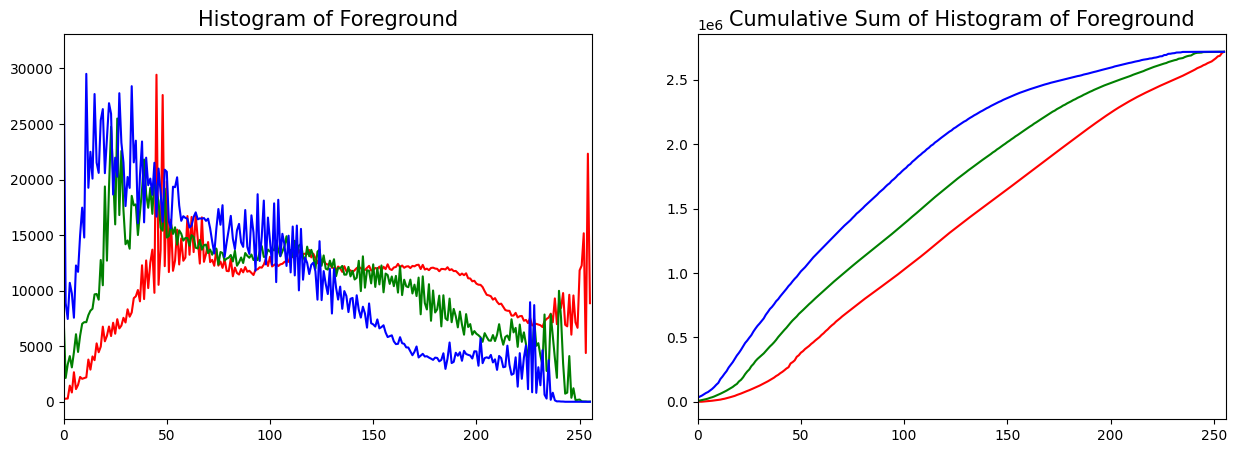

In [25]:
# Create subplots for histograms
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.rc("axes", titlesize=15)

# Make a copy of the foreground image for equalization
equalized_foreground_image = foreground_rgb.copy()

# Define color channels and calculate the total number of foreground pixels
color_channels = ('r', 'g', 'b')
total_foreground_pixels = binary_mask.sum() // 255

# Loop over color channels and calculate and plot histograms
for i, channel_color in enumerate(color_channels):
    # Calculate the histogram for the current color channel considering only the foreground
    channel_hist = cv.calcHist([foreground_rgb], [i], binary_mask, [256], [0, 256])
    ax[0].plot(channel_hist, color=channel_color)
    ax[0].set_xlim([0, 256])

    # Calculate the cumulative sum of the histogram
    cumulative_hist = np.cumsum(channel_hist)
    ax[1].plot(cumulative_hist, color=channel_color)
    ax[1].set_xlim([0, 256])

    # Perform histogram equalization and update the corresponding color channel in the equalized image
    equalized_transform = cumulative_hist * 255 / cumulative_hist[-1]
    equalized_foreground_image[:, :, i] = equalized_transform[foreground_rgb[:, :, i]]

# Remove background again after equalization
equalized_foreground_image = np.bitwise_and(equalized_foreground_image, mask_3d)

# Set titles for the subplots
ax[0].set_title("Histogram of Foreground")
ax[1].set_title("Cumulative Sum of Histogram of Foreground")


e,f) Cumulative Sum of the Histogram & Histogram-Equalized Foreground

(-0.5, 3839.5, 2159.5, -0.5)

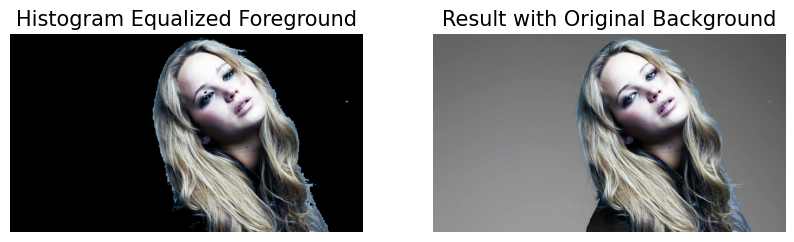

In [27]:
# Create a mask for the background by inverting the foreground mask
background_mask_3d = 255 - mask_3d
background_hsv = np.bitwise_and(img6_hsv, background_mask_3d)   # Extract the background
background_rgb = cv.cvtColor(background_hsv, cv.COLOR_HSV2RGB)

# Combine the background with the equalized foreground to create the final image
final_image = background_rgb + equalized_foreground_image

# Create a figure for plotting
plt.figure(figsize=(10, 10))

# Plot the equalized foreground
plt.subplot(121)
plt.imshow(equalized_foreground_image)
plt.title('Histogram Equalized Foreground')
plt.axis('off')

# Plot the final result with the original background
plt.subplot(122)
plt.imshow(final_image)
plt.title('Result with Original Background')
plt.axis('off')

7)Filtering with the Sobel operator

Text(0.5, 1.0, 'Sobel filter using Multiplication property')

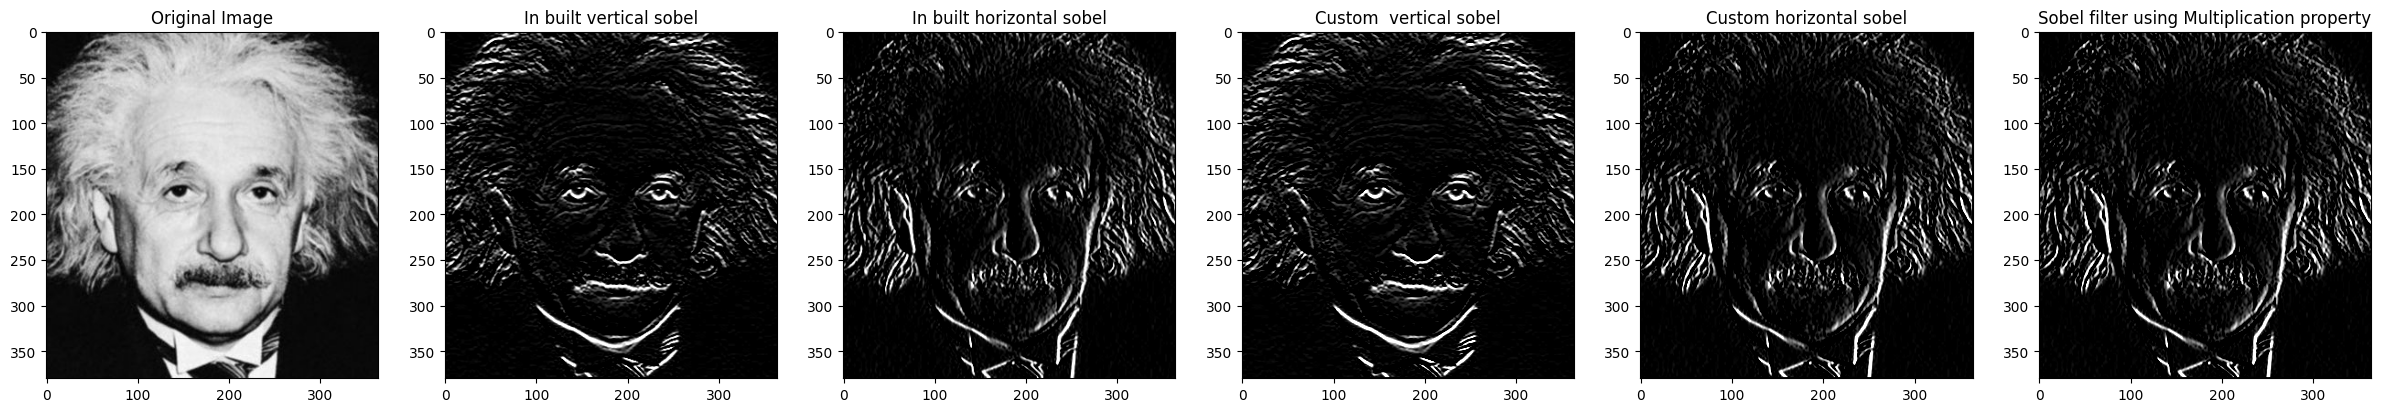

In [18]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Custom Sobel function
def sobel(img, kernal):
    kernalW = kernal.shape[0]
    kernalH = kernal.shape[1]
    padSize1 = kernalW//2
    padSize2 = kernalH//2

    centerPointx = kernalW//2 + 1
    centerPointy = kernalH//2 + 1

    Imgfiltered = np.zeros((img.shape[0],img.shape[1]), dtype = np.float32)
    for i in range(padSize1,img.shape[0]-padSize1):
        for j in range(padSize2, img.shape[1]-padSize2):
            matrix = img[i-kernalW//2:i + kernalW//2+1, j-kernalH//2:j + kernalH//2+1]
            value = sum(sum(matrix * kernal))
            Imgfiltered[i,j] = value
    return Imgfiltered


img = cv.imread('einstein.png',cv.IMREAD_GRAYSCALE)
ImgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,6, figsize = (30,30))
ax[0].imshow(ImgConverted)
ax[0].set_title('Original Image')

#inbuilt sobel
Sobel_V = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float32)
Sobel_H = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype = np.float32)
sobelVimg = cv.filter2D(img,-1,Sobel_V)
sobelHimg = cv.filter2D(img,-1,Sobel_H)

#Call the custom sobel function

CustomSobelVimg = sobel(img, Sobel_V)
CustomSobelHimg = sobel(img, Sobel_H)

ax[1].imshow(sobelVimg, cmap = 'gray',vmin = 0,vmax = 255)
ax[1].set_title('In built vertical sobel')
ax[2].imshow(sobelHimg, cmap = 'gray',vmin = 0,vmax = 255)
ax[2].set_title('In built horizontal sobel')
ax[3].imshow(CustomSobelVimg, cmap = 'gray',vmin = 0,vmax = 255)
ax[3].set_title('Custom  vertical sobel')
ax[4].imshow(CustomSobelHimg, cmap = 'gray',vmin = 0,vmax = 255)
ax[4].set_title('Custom horizontal sobel')
sobel1 = np.array([[1],[2],[1]],dtype = np.float32)
sobel2 = np.array([[1, 0, -1]],dtype = np.float32)
Img1 = sobel(img, sobel1)
Img2 = sobel(Img1, sobel2)
ax[5].imshow(Img2, cmap = 'gray',vmin = 0,vmax = 255)
ax[5].set_title('Sobel filter using Multiplication property')

8)zoom images by a given factor

SSD of Nearest Neighbour method: 120.33522810570987
SSD of Bilinear method: 118.57803144290123


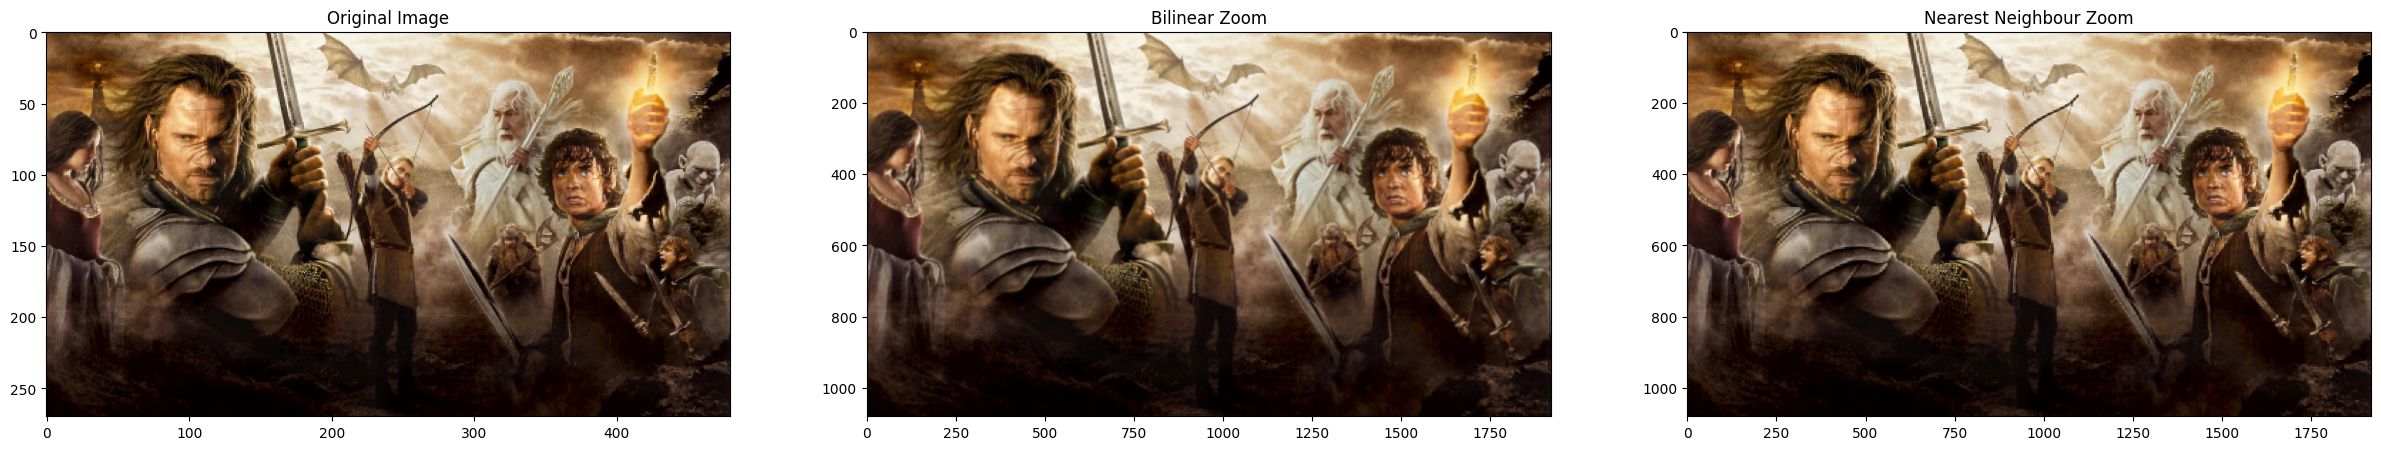

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#(a)  Nearest Neighbour
def custom_zoom(img, factor):
    zoomed = np.zeros((int(img.shape[0] * factor), int(img.shape[1] * factor), 3), dtype=img.dtype)
    for i in range(zoomed.shape[0]):
        for j in range(zoomed.shape[1]):
            x = int(round(i / factor, 0))
            y = int(round(j / factor, 0))
            if x >= img.shape[0]:
                x = img.shape[0] - 1
            if y >= img.shape[1]:
                y = img.shape[1] - 1
            zoomed[i, j] = img[x, y]
    return zoomed

#(b) Bilinear Interpolation
def custom_zoom_bilinear(img, factor):
    zoomed = np.zeros((int(img.shape[0] * factor), int(img.shape[1] * factor), 3), dtype=img.dtype)
    for i in range(zoomed.shape[0]):
        for j in range(zoomed.shape[1]):
            x = i / factor
            y = j / factor
            x1 = int(x)
            y1 = int(y)
            x2 = int(x) + 1
            y2 = int(y) + 1
            if x1 >= img.shape[0]:
                x1 = img.shape[0] - 1
            if x2 >= img.shape[0]:
                x2 = img.shape[0] - 1
            if y1 >= img.shape[1]:
                y1 = img.shape[1] - 1
            if y2 >= img.shape[1]:
                y2 = img.shape[1] - 1
            val1 = img[x1, y1] * abs(y - y2) + img[x1, y2] * abs(y - y1)
            val2 = img[x2, y1] * abs(y - y2) + img[x2, y2] * abs(y - y1)
            val3 = val1 * abs(x - x2) + val2 * abs(x - x1)
            for k in range(3):
                val3[k] = int(round(val3[k], 0))
            zoomed[i, j] = val3
    return zoomed

image = cv.imread('im01small.png')
CvtImg = cv.cvtColor(image, cv.COLOR_BGR2RGB)

factor = 4
zoomedBilinear = custom_zoom_bilinear(image, factor)
zoomedNearest = custom_zoom(image, factor)

fig, ax = plt.subplots(1, 3, figsize=(30, 30))
ax[0].imshow(CvtImg)
ax[0].set_title('Original Image')

CvtImgBilinear = cv.cvtColor(zoomedBilinear, cv.COLOR_BGR2RGB)
ax[1].imshow(CvtImgBilinear)
ax[1].set_title('Bilinear Zoom')
cv.imwrite("zoomedBilinear.jpg", zoomedBilinear)

CvtImgNearest = cv.cvtColor(zoomedNearest, cv.COLOR_BGR2RGB)
ax[2].imshow(CvtImgNearest)
ax[2].set_title('Nearest Neighbour Zoom')
cv.imwrite("zoomed.jpg", zoomedNearest)

OriginalImg = cv.imread('im01.png')
ssd_nearest = np.sum((OriginalImg - zoomedNearest)**2) / (OriginalImg.shape[0] * OriginalImg.shape[1])
print("SSD of Nearest Neighbour method:", ssd_nearest)
print("SSD of Bilinear method:", np.sum((OriginalImg - zoomedBilinear)**2) / (OriginalImg.shape[0] * OriginalImg.shape[1]))

plt.show()

9)Image enhancing

Text(0.5, 1.0, 'Mask')

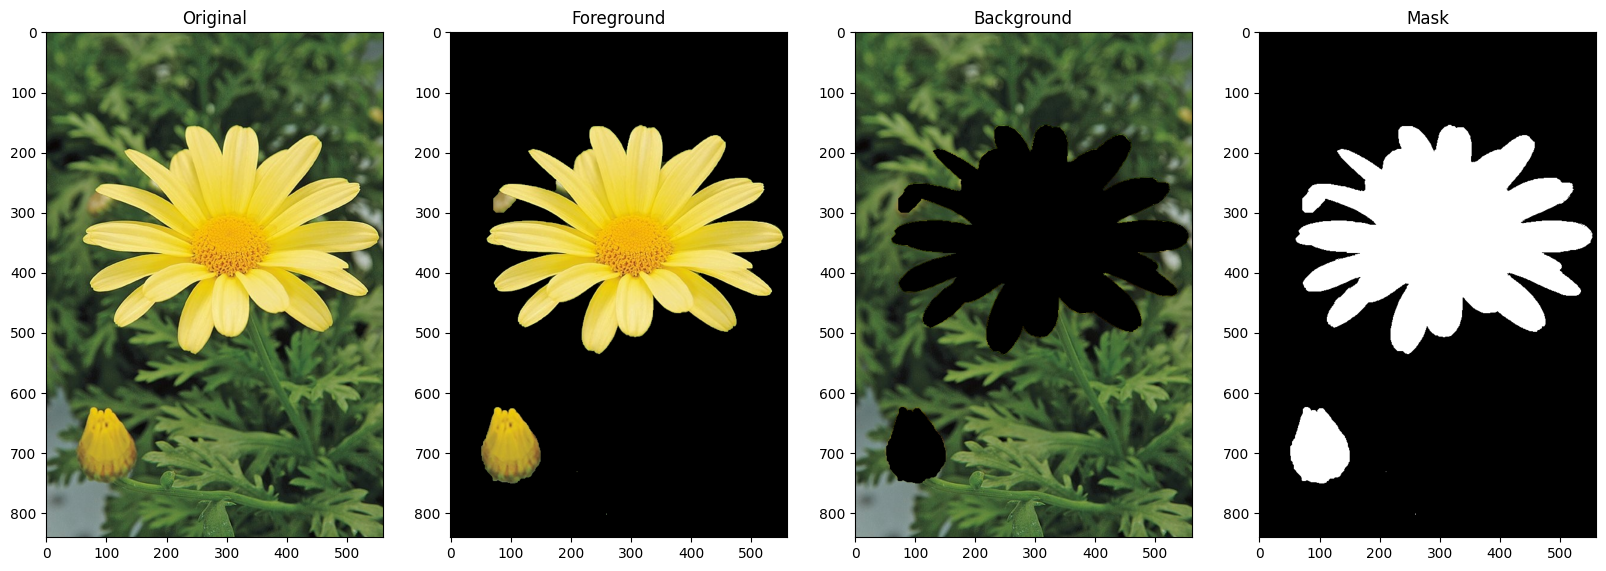

In [26]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img0 = cv.imread('yellow.jpg')
CvtImg1 = cv.cvtColor(Img0, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,4, figsize = (20,20))
ax[0].imshow(CvtImg1)
ax[0].set_title('Original')
mask1 = np.zeros(Img0.shape[:2],np.uint8)
background = np.zeros((1,65),np.float64)
foreground = np.zeros((1,65),np.float64)
rect = (50,120,520,700)
cv.grabCut(Img0,mask1,rect,background,foreground,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask1==2)|(mask1==0),0,1).astype('uint8')
Img1 = Img0*mask2[:,:,np.newaxis]
CvtImg2 = cv.cvtColor(Img1, cv.COLOR_BGR2RGB)
ax[1].imshow(CvtImg2)
ax[1].set_title('Foreground')
Img2= Img0 - Img1
CvtImg3 = cv.cvtColor(Img2, cv.COLOR_BGR2RGB)
ax[2].imshow(CvtImg3)
ax[2].set_title('Background')
CvtImg4 = cv.cvtColor(mask1, cv.COLOR_BGR2RGB)
ax[3].imshow(mask2, cmap = 'gray')
ax[3].set_title('Mask')

Text(0.5, 1.0, 'Enhanced Image')

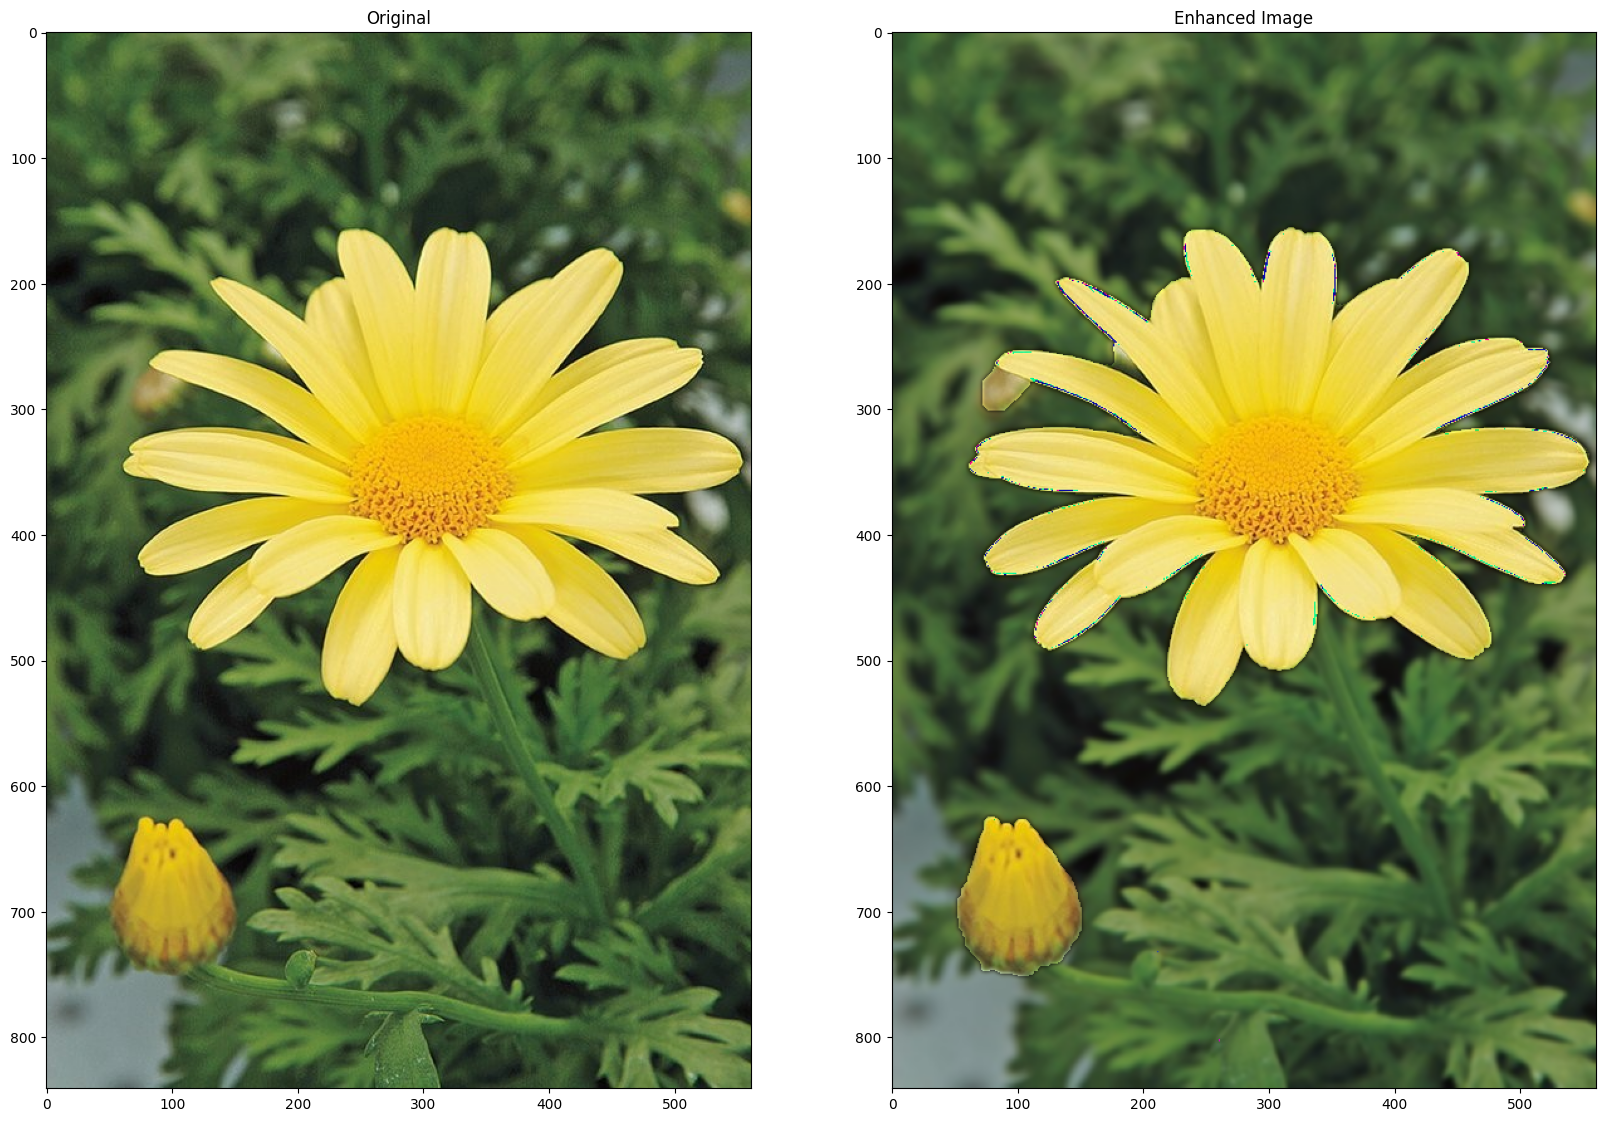

In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img0 = cv.imread('yellow.jpg')
CvtImg = cv.cvtColor(Img0, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2, figsize = (20,20))
ax[0].imshow(CvtImg)
ax[0].set_title('Original')
Img3 = cv.GaussianBlur(Img2, (9,9),0)
Img4 = Img1 + Img3
CvtImg5 = cv.cvtColor(Img4, cv.COLOR_BGR2RGB)
ax[1].imshow(CvtImg5)
ax[1].set_title('Enhanced Image')